#### What is PCA?
PCA stands for Principal Component Analysis. It is a dimensionality reduction technique used to reduce the number of features in a dataset while retaining most of the variance (information) in the data. PCA is particularly useful when dealing with high-dimensional data, where it can help simplify the data, reduce noise, and make the data easier to visualize or use in machine learning algorithms.


#### How Does PCA Work?
PCA works by finding the directions (called principal components) along which the data varies the most. These directions are orthogonal (perpendicular) to each other and ordered by the amount of variance they capture. The first principal component captures the most variance, the second the second-most, and so on. By projecting the data onto these principal components, PCA transforms the original dataset into a new set of variables that are uncorrelated.

#### Why Use PCA?
Dimensionality Reduction: By reducing the number of features, PCA can help simplify models, reduce overfitting, and improve computational efficiency.
Noise Reduction: PCA can help remove noise from the data by focusing on the components that capture the most variance.
Data Visualization: PCA is often used to visualize high-dimensional data in 2D or 3D by reducing it to two or three principal components.

## Implementing PCA on the Iris Dataset

In [1]:
#We'll use scikit-learn to load the Iris dataset and matplotlib for visualization.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler #StandardScaler standardizes the features by removing the mean and scaling 
#to unit variance,The StandardScaler is a tool used for feature scaling, which is an essential step in data preprocessing
#before applying many machine learning algorithms. Feature scaling ensures that all features contribute equally to the model's
#performance,which can be particularly important for algorithms sensitive to the scale of input data, like PCA,SVM,k-means clustering 

In [4]:
#Step 2: Load and Explore the Dataset
#The Iris dataset contains 150 samples with 4 features each (sepal length, sepal width, petal length, petal width).
# Load the Iris dataset
iris = load_iris()
X = iris.data #assigns the feature data of the Iris dataset to the variable X.
y = iris.target # assigns the target labels of the Iris dataset to the variable y.
target_names = iris.target_names #assigns the names of the target classes(species of iris flowers)to variable target_names.

# Display the first few rows
print("First five rows of the Iris dataset:\n", X[:5])


First five rows of the Iris dataset:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [2]:
import sklearn.datasets as datasets

# List all attributes in the sklearn.datasets module
print(dir(datasets))

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_base', '_california_housing', '_covtype', '_kddcup99', '_lfw', '_olivetti_faces', '_openml', '_rcv1', '_samples_generator', '_species_distributions', '_svmlight_format_fast', '_svmlight_format_io', '_twenty_newsgroups', 'clear_data_home', 'dump_svmlight_file', 'fetch_20newsgroups', 'fetch_20newsgroups_vectorized', 'fetch_california_housing', 'fetch_covtype', 'fetch_kddcup99', 'fetch_lfw_pairs', 'fetch_lfw_people', 'fetch_olivetti_faces', 'fetch_openml', 'fetch_rcv1', 'fetch_species_distributions', 'get_data_home', 'load_boston', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine', 'make_biclusters', 'make_blobs', 'make_checkerboard', 'make_circles', 'make_classification', 'make_friedman1', 'make_friedman2', 'make

In [3]:
help(datasets)

Help on package sklearn.datasets in sklearn:

NAME
    sklearn.datasets

DESCRIPTION
    The :mod:`sklearn.datasets` module includes utilities to load datasets,
    including methods to load and fetch popular reference datasets. It also
    features some artificial data generators.

PACKAGE CONTENTS
    _base
    _california_housing
    _covtype
    _kddcup99
    _lfw
    _olivetti_faces
    _openml
    _rcv1
    _samples_generator
    _species_distributions
    _svmlight_format_fast
    _svmlight_format_io
    _twenty_newsgroups
    setup
    tests (package)

FUNCTIONS
    clear_data_home(data_home=None)
        Delete all the content of the data home cache.
        
        Parameters
        ----------
        data_home : str, default=None
            The path to scikit-learn data directory. If `None`, the default path
            is `~/sklearn_learn_data`.
    
    dump_svmlight_file(X, y, f, *, zero_based=True, comment=None, query_id=None, multilabel=False)
        Dump the datase

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [ ]:
Step 3: Standardize the Data
PCA is sensitive to the scale of the data, so we standardize it to have a mean of 0 and a standard deviation of 1.

In [7]:
# Standardize the data
#Standardization is a process of transforming data to have a mean of 0 and a standard deviation of 1.
#This is especially important in ML because many algorithms, like PCA, are sensitive to the scale of the input data.
scaler = StandardScaler() # creates an instance of the StandardScaler class from the sklearn.preprocessing module.

"""X_std = scaler.fit_transform(X)
fit_transform is a method that does two things:
Fit: It calculates the mean and standard deviation of each feature in the dataset X.
Transform:It then uses these statistics to standardize the data by subtracting mean from each feature and then 
dividing by standard deviation.
The result, X_std, is standardized version of original data X, where each feature now has a mean of 0 and a standard deviation of 1"""
X_std = scaler.fit_transform(X) 

print("Standardized data:\n", X_std[:5]) #prints first five rows of standardized data.

Standardized data:
 [[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [12]:
#Step 4: Perform PCA
#Now, we'll perform PCA on the standardized data. We'll reduce the data to 2 principal components to visualize it in 2D space.

pca = PCA(n_components=2) # The parameter n_components=2 specifies that we want to reduce the data to 2 principal components. 
X_pca = pca.fit_transform(X_std) #Fit: PCA learns the principal components from the standardized data X_std. It identifies
#directions (principal components) in which the data varies the most.
#Transform: The original data is then projected onto these new principal components,resulting in new dataset X_pca with
#reduced dimensions (in this case, 2 dimensions).
#X_pca contains the transformed data, where each row represents the original data point in the new 2D space defined by the principal components.

print("PCA components:\n", X_pca[:5])#prints the first five rows of the transformed data


PCA components:
 [[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]]


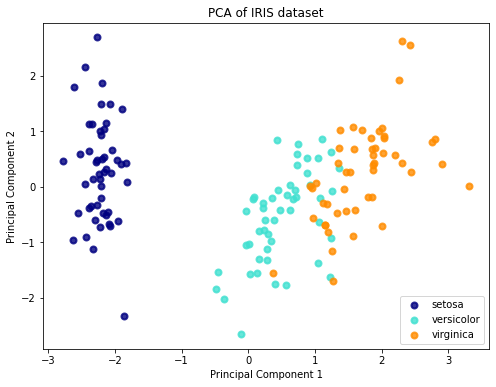

In [13]:
#Step 5: Visualize the Results
# Plot the PCA result
plt.figure(figsize=(8, 6))
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [15]:
#Evaluate the Explained Variance
#check how much variance is explained by the two principal components we retained.
#explained_variance_ratio_ in Principal Component Analysis (PCA) represents the proportion of the dataset's variance 
#that each principal component captures. 
print("Explained variance by each component:\n", pca.explained_variance_ratio_)
print("Total variance explained by the two components:", np.sum(pca.explained_variance_ratio_))

Explained variance by each component:
 [0.72962445 0.22850762]
Total variance explained by the two components: 0.9581320720000164


Conclusion


In this project, we performed PCA on the Iris dataset to reduce its dimensionality and visualize the data in 2D space. PCA helped in capturing the variance in the data with just two principal components, which can be extremely useful for exploratory data analysis and as a preprocessing step before applying machine learning algorithms.